<a href="https://colab.research.google.com/github/cccastanedaa/Analisis_Validaciones_Estaciones/blob/main/Proyecto_Final_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PROYECTO FINAL ANALISIS VALIDACIONES ESTACIONES CON PUERTAS AUTOMATICAS SISTEMA TRANSMILENIO#

PRESENTADO POR: CRISTIAN CAMILO CASTAÑEDA AGUDELO

DOCENTE: ING. JESUS RUBIO

BOGOTA D.C.

2024



---



**Índice<a name="id1"></a>**
1. [Resumen](#id1)
2. [Instalación e Importación de bibliotecas](#id2)
3.[Dataset´s](#id3)
    *   3.1 [Dataset Numero N°1 Estaciones Trocales de Transmilenio](#id4)
    *   3.2 [Datset Numero N°2 Validaciones Tarjeta Tullave SITP](#id5)
4. [Normalización y limpieza](#id6)
    *   4.1 [Normalización Dataset Numero N°1](#id7)
    *   4.2 [Normalización Numero N°2](#id8)
5. [Visualización y Análisis](#id9)
6. [Conclusiones](#id10)

## 1. Resumen<a name="id1"></a>##

Tendiendo en cuenta el fenomeno de evasión que se presenta en el sistema troncal TRANSMILENIO, la Entidad en el año 2021 publico un proceso de contratación para el suministro de puertas automaticas con el fin de mejorar la infraestructa del sistema y mitigar la evasión.

En ese sentido el proyecto consiste en analizar si en las estaciones donde se han instalado estas puertas las validaciones de pasajeros han aumentado como consecuencia de la instalación de estos equipos al  comporar las validaciones antes y despues de la instalación de las puertas.

## 2. Instalación e importación de Biblotecas<a name="id2"></a>##

In [2]:
pip install pandas

In [3]:
pip install folium

In [4]:
pip install requests

In [5]:
import pandas as pd

In [6]:
import seaborn as sns

In [7]:
import matplotlib.pyplot as plt

In [8]:
import folium

In [9]:
import requests

In [10]:
import json

In [11]:
from bs4 import BeautifulSoup

In [12]:
import urllib.parse

## 3. Dataset´s<a name="id3"></a>

Los Dataset´s utilizados fuero tomados de (Datos Abiertos Colombia | Datos Abiertos Colombia) para ello se va comparar la información de validaciones del año 2022 y 2024 del primer cuatrimestre.

  Se escogieron dos Datasets referentes al sistema de transporte Transmilenio:
  1. Dataset Numero N°1: ([Estaciones Troncales de Transmilenio](https://www.datos.gov.co/dataset/Estaciones-Troncales-de-Transmilenio/ff9r-fvht/about_data)).
  2. Dataset Numero N°2: ([Validaciones Tarjeta Tullave SITP](https://www.datos.gov.co/dataset/Validaciones-Tarjeta-Tullave-SITP/xxsa-rxte/about_data)). para años 2019 y año 2024.


## 3.1 Normalización Dataset Numero N°1 Estaciones Trocales de Transmilenio <a name="id4"></a>

In [13]:
url_dataset_1= "https://gis.transmilenio.gov.co/arcgis/rest/services/Troncal/consulta_estaciones_troncales/MapServer/1"

In [14]:
query_url = f"{url_dataset_1}/query"
params = {
    "where": "1=1",  # Seleccionar todas las estaciones
    "outFields": "*",  # Obtener todos los campos
    "f": "json"
}

In [15]:
response = requests.get(query_url, params=params, verify = False)

/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1100: InsecureRequestWarning: Unverified HTTPS request is being made to host 'gis.transmilenio.gov.co'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [16]:
print (response)

<Response [200]>


In [17]:
query_1_response = requests.get(query_url, params=params, verify=False)

/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1100: InsecureRequestWarning: Unverified HTTPS request is being made to host 'gis.transmilenio.gov.co'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [18]:
query_dataset_1 = query_1_response.json()

In [19]:
estaciones = query_dataset_1["features"]
for estacion in estaciones:
    atributos = estacion["attributes"]
    print(f"Nombre Estación: {atributos['nombre_estacion']}")
    print(f"Troncal: {atributos['troncal_estacion']}")
    print(f"Latitud Estación: {atributos['latitud_estacion']}")
    print(f"Longitud Estación: {atributos['longitud_estacion']}")

Nombre Estación: AV. Chile
Troncal: NQS
Latitud Estación: 4.66634138
Longitud Estación: -74.07456156
Nombre Estación: Ricaurte - NQS
Troncal: NQS
Latitud Estación: 4.6116862
Longitud Estación: -74.09386888
Nombre Estación: Suba - Calle 100
Troncal: Suba
Latitud Estación: 4.6903983
Longitud Estación: -74.06561783
Nombre Estación: Calle 75 - Zona M
Troncal: NQS
Latitud Estación: 4.67015567
Longitud Estación: -74.07131021
Nombre Estación: AV. Boyacá
Troncal: Calle 80
Latitud Estación: 4.69395205
Longitud Estación: -74.08711277
Nombre Estación: La Campiña
Troncal: Suba
Latitud Estación: 4.74254284
Longitud Estación: -74.09105627
Nombre Estación: Transversal 86
Troncal: Americas
Latitud Estación: 4.63419961
Longitud Estación: -74.15206292
Nombre Estación: 7 de Agosto
Troncal: NQS
Latitud Estación: 4.65729068
Longitud Estación: -74.07766289
Nombre Estación: Polo
Troncal: Calle 80
Latitud Estación: 4.67069263
Longitud Estación: -74.06474882
Nombre Estación: Paloquemao
Troncal: NQS
Latitud Est

In [20]:
nombres_estacion = []
troncales = []
latitudes = []
longitudes = []

In [21]:
for estacion in estaciones:
    atributos = estacion["attributes"]
    nombres_estacion.append(atributos['nombre_estacion'])
    troncales.append(atributos['troncal_estacion'])
    latitudes.append(atributos['latitud_estacion'])
    longitudes.append(atributos['longitud_estacion'])

In [22]:
data = {
    "Nombre Estación": nombres_estacion,
    "Troncal": troncales,
    "Latitud Estación": latitudes,
    "Longitud Estación": longitudes
}

In [23]:
df_query_estaciones = pd.DataFrame(data)

In [24]:
df_query_estaciones

,Nombre Estación,Troncal,Latitud Estación,Longitud Estación
0,AV. Chile,NQS,4.666341,-74.074562
1,Ricaurte - NQS,NQS,4.611686,-74.093869
2,Suba - Calle 100,Suba,4.690398,-74.065618
3,Calle 75 - Zona M,NQS,4.670156,-74.071310
4,AV. Boyacá,Calle 80,4.693952,-74.087113
...,...,...,...,...
144,San Facon Carrera 22,Americas,4.609818,-74.086712
145,Flores – Areandina,Caracas,4.654906,-74.063021
146,Las Aguas - Centro Colombo Americano,Eje Ambiental,4.602580,-74.068401
147,El Tiempo – Cámara de Comercio de Bogotá,Calle 26,4.657081,-74.105625


In [25]:
df_query_estaciones['Nombre Estación'].unique()

array(['AV. Chile', 'Ricaurte - NQS', 'Suba - Calle 100',
       'Calle 75 - Zona M', 'AV. Boyacá', 'La Campiña', 'Transversal 86',
       '7 de Agosto', 'Polo', 'Paloquemao', 'Suba - TV. 91',
       'La Castellana', 'Comuneros', 'CAD', 'Movistar Arena', 'Gratamira',
       'Ferias', 'San Martín', 'Santa Isabel', 'Suba - Calle 95',
       'Puentelargo', 'Rionegro', '21 Ángeles', 'NQS - Calle 38A S',
       'NQS - Calle 30 S', 'General Santander', 'Perdomo', 'Sevillana',
       'SENA', 'Venecia', 'Portal 20 de Julio', 'Campín - UAN',
       'Portal Suba', 'Distrito Grafiti', 'Calle 100 - Marketmedios',
       'Portal Norte', 'Calle 45 - American School Way',
       'Ciudad Jardín - UAN', 'Portal 80', 'Portal El Dorado',
       'Portal Usme', 'Portal Tunal', 'Portal Américas', 'CAN',
       'San Diego', 'Quirigua', 'AV. Américas - AV. Boyacá', 'Marsella',
       'Niza - Calle 127', 'Guatoque - Veraguas', 'CDS - Carrera 32',
       'Ciudad Universitaria - Lotería de Bogotá', 'AV. Rojas',


## 3.2 Dataset Numero N°2 Validaciones Tarjeta Tullave SITP <a name="id5"></a>

In [26]:
import requests

In [27]:
# Reemplaza OWNER y REPO con los valores correspondientes
owner = "cccastanedaa"
repo = "Analisis_Validaciones_Estaciones"
path = "data" # Ruta del directorio o archivo que deseas obtener

url = f"https://api.github.com/repos/{owner}/{repo}/contents/{path}"

response = requests.get(url)

if response.status_code == 200:
    contents = response.json()
    # Procesa el contenido del repositorio según tus necesidades
    for content in contents:
        print(content)
else:
    print(f"Error: {response.status_code} - {response.json()['message']}")

{'name': '01-TM-Resumen-de-Validaciones-Troncales-al-31-Ene-2024-Intervalo-15-Mint-csv.csv', 'path': 'data/01-TM-Resumen-de-Validaciones-Troncales-al-31-Ene-2024-Intervalo-15-Mint-csv.csv', 'sha': 'c1f64d1a0bcd3c83cd09b49fdfb76f969a10b3f7', 'size': 11822269, 'url': 'https://api.github.com/repos/cccastanedaa/Analisis_Validaciones_Estaciones/contents/data/01-TM-Resumen-de-Validaciones-Troncales-al-31-Ene-2024-Intervalo-15-Mint-csv.csv?ref=main', 'html_url': 'https://github.com/cccastanedaa/Analisis_Validaciones_Estaciones/blob/main/data/01-TM-Resumen-de-Validaciones-Troncales-al-31-Ene-2024-Intervalo-15-Mint-csv.csv', 'git_url': 'https://api.github.com/repos/cccastanedaa/Analisis_Validaciones_Estaciones/git/blobs/c1f64d1a0bcd3c83cd09b49fdfb76f969a10b3f7', 'download_url': 'https://raw.githubusercontent.com/cccastanedaa/Analisis_Validaciones_Estaciones/main/data/01-TM-Resumen-de-Validaciones-Troncales-al-31-Ene-2024-Intervalo-15-Mint-csv.csv', 'type': 'file', '_links': {'self': 'https://ap

### Año 2024###

#### Enero 2024 ####

In [28]:
dataframe_ene_2024 = pd.read_csv(contents[0]['download_url'], decimal = ',',thousands='.')

In [29]:
dataframe_ene_2024.head()

,Año,Mes,Fase,Línea,Estación,Acceso de Estación,Intervalo,01/01/2024,02/01/2024,03/01/2024,...,23/01/2024,24/01/2024,25/01/2024,26/01/2024,27/01/2024,28/01/2024,29/01/2024,30/01/2024,31/01/2024,Total general
0,2024,Enero,Dual,(10006) M84-C84,(10013) M84 - C84,(73653),8:00,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,2024,Enero,Dual,(10006) M84-C84,(10013) M84 - C84,(73653),8:15,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2024,Enero,Dual,(10006) M84-C84,(10013) M84 - C84,(73653),10:15,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2024,Enero,Dual,(10006) M84-C84,(10013) M84 - C84,(73653),10:45,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,2024,Enero,Dual,(10006) M84-C84,(10013) M84 - C84,(73653),11:00,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [30]:
dataframe_ene_2024['Total general'].sum()

40910613

In [31]:
 #Seleccionar columnas iniciales y columna final
columnas_iniciales_ene_2024 = dataframe_ene_2024.iloc[:, [0,1,2,4]]
columna_final_ene_2024 = dataframe_ene_2024.iloc[:, -1]

# Concatenar columnas iniciales y columna final
dataframe_ene_2024_ajustado = pd.concat([columnas_iniciales_ene_2024, columna_final_ene_2024], axis=1)

# Renombrar columnas
dataframe_ene_2024_ajustado.rename(columns={'Total general': 'Total general validaciones'}, inplace=True)

In [32]:
dataframe_ene_2024_ajustado.head()

,Año,Mes,Fase,Estación,Total general validaciones
0,2024,Enero,Dual,(10013) M84 - C84,1
1,2024,Enero,Dual,(10013) M84 - C84,1
2,2024,Enero,Dual,(10013) M84 - C84,1
3,2024,Enero,Dual,(10013) M84 - C84,2
4,2024,Enero,Dual,(10013) M84 - C84,2


In [33]:
dataframe_ene_2024_ajustado['Total general validaciones'].sum()

40910613

In [34]:
# Filtrar y eliminar filas
dataframe_ene_2024_ajustado = dataframe_ene_2024_ajustado[dataframe_ene_2024_ajustado['Fase'] != 'Dual']
dataframe_ene_2024_ajustado = dataframe_ene_2024_ajustado[dataframe_ene_2024_ajustado['Total general validaciones'] != 0]


#### Febrero 2024 ####

In [35]:
dataframe_feb_2024 = pd.read_csv(contents[3]['download_url'], decimal = ',',thousands='.')

In [36]:
dataframe_feb_2024.head()

,Año,Mes,Fase,Línea,Estación,Acceso de Estación,Intervalo,01/02/2024,02/02/2024,03/02/2024,...,23/02/2024,24/02/2024,25/02/2024,26/02/2024,27/02/2024,28/02/2024,29/02/2024,01/03/2024,02/03/2024,Total general
0,2024,Febrero,Dual,(10006) M84-C84,(10013) M84 - C84,(0) (Unknown),6:00,0,4,0,...,0,0,0,0,0,0,0,NaN,NaN,4
1,2024,Febrero,Dual,(10006) M84-C84,(10013) M84 - C84,(0) (Unknown),9:15,0,0,0,...,0,0,0,0,0,1,0,NaN,NaN,1
2,2024,Febrero,Dual,(10006) M84-C84,(10013) M84 - C84,(0) (Unknown),9:30,0,0,0,...,0,0,0,0,0,2,0,NaN,NaN,2
3,2024,Febrero,Dual,(10006) M84-C84,(10013) M84 - C84,(0) (Unknown),9:45,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,1
4,2024,Febrero,Dual,(10006) M84-C84,(10013) M84 - C84,(0) (Unknown),10:45,0,0,0,...,0,0,0,0,0,0,2,NaN,NaN,2


In [37]:
dataframe_feb_2024['Total general'].sum()

50355019

In [38]:
#Seleccionar columnas iniciales y columna final
columnas_iniciales_feb_2024 = dataframe_feb_2024.iloc[:, [0,1,2,4]]
columna_final_feb_2024 = dataframe_feb_2024.iloc[:, -1]

# Concatenar columnas iniciales y columna final
dataframe_feb_2024_ajustado = pd.concat([columnas_iniciales_feb_2024, columna_final_feb_2024], axis=1)

# Renombrar columnas
dataframe_feb_2024_ajustado.rename(columns={'Total general': 'Total general validaciones'}, inplace=True)

In [39]:
dataframe_feb_2024_ajustado.head()

,Año,Mes,Fase,Estación,Total general validaciones
0,2024,Febrero,Dual,(10013) M84 - C84,4
1,2024,Febrero,Dual,(10013) M84 - C84,1
2,2024,Febrero,Dual,(10013) M84 - C84,2
3,2024,Febrero,Dual,(10013) M84 - C84,1
4,2024,Febrero,Dual,(10013) M84 - C84,2


In [40]:
dataframe_feb_2024_ajustado['Total general validaciones'].sum()

50355019

#### Marzo 2024 ####

In [41]:
dataframe_mar_2024 = pd.read_csv(contents[5]['download_url'], decimal = ',',thousands='.')

In [42]:
dataframe_mar_2024.head()

,Año,Mes,Fase,Línea,Estación,Acceso de Estación,Intervalo,01/03/2024,02/03/2024,03/03/2024,...,23/03/2024,24/03/2024,25/03/2024,26/03/2024,27/03/2024,28/03/2024,29/03/2024,30/03/2024,31/03/2024,Total general
0,2024,Marzo,Dual,(10006) M84-C84,(10013) M84 - C84,(0) (Unknown),4:45,0,0,0,...,2,0,0,0,0,0,0,0,0,2
1,2024,Marzo,Dual,(10006) M84-C84,(10013) M84 - C84,(0) (Unknown),5:00,0,0,0,...,17,0,0,0,0,0,0,0,0,17
2,2024,Marzo,Dual,(10006) M84-C84,(10013) M84 - C84,(0) (Unknown),5:15,0,0,0,...,19,0,0,0,0,0,0,0,0,19
3,2024,Marzo,Dual,(10006) M84-C84,(10013) M84 - C84,(0) (Unknown),5:30,0,0,0,...,12,0,0,0,0,0,0,0,0,12
4,2024,Marzo,Dual,(10006) M84-C84,(10013) M84 - C84,(0) (Unknown),5:45,0,0,0,...,15,0,0,0,0,0,0,0,0,15


In [43]:
#Seleccionar columnas iniciales y columna final
columnas_iniciales_mar_2024 = dataframe_mar_2024.iloc[:, [0,1,2,4]]
columna_final_mar_2024 = dataframe_mar_2024.iloc[:, -1]

# Concatenar columnas iniciales y columna final
dataframe_mar_2024_ajustado = pd.concat([columnas_iniciales_mar_2024, columna_final_mar_2024], axis=1)

# Renombrar columnas
dataframe_mar_2024_ajustado.rename(columns={'Total general': 'Total general validaciones'}, inplace=True)

In [44]:
dataframe_mar_2024_ajustado.head()

,Año,Mes,Fase,Estación,Total general validaciones
0,2024,Marzo,Dual,(10013) M84 - C84,2
1,2024,Marzo,Dual,(10013) M84 - C84,17
2,2024,Marzo,Dual,(10013) M84 - C84,19
3,2024,Marzo,Dual,(10013) M84 - C84,12
4,2024,Marzo,Dual,(10013) M84 - C84,15


In [45]:
dataframe_mar_2024_ajustado['Total general validaciones'].sum()

46477509

#### Abril 2024 ####

In [46]:
dataframe_abr_2024 = pd.read_csv(contents[7]['download_url'], decimal = ',',thousands='.')

In [47]:
dataframe_abr_2024.head()

,Año,Mes,Fase,Línea,Estación,Acceso de Estación,Intervalo,01/04/2024,02/04/2024,03/04/2024,...,23/04/2024,24/04/2024,25/04/2024,26/04/2024,27/04/2024,28/04/2024,29/04/2024,30/04/2024,01/05/2024,Total general
0,2024,Abril,Dual,(10006) M84-C84,(10013) M84 - C84,(0) (Unknown),6:15,0,43,0,...,0,0,0,0,0,0,0,0,NaN,43
1,2024,Abril,Dual,(10006) M84-C84,(10013) M84 - C84,(0) (Unknown),7:00,0,1,0,...,0,0,0,0,0,0,0,0,NaN,1
2,2024,Abril,Dual,(10006) M84-C84,(10013) M84 - C84,(0) (Unknown),7:15,0,2,0,...,0,0,0,0,0,0,0,0,NaN,2
3,2024,Abril,Dual,(10006) M84-C84,(10013) M84 - C84,(0) (Unknown),7:30,0,0,0,...,0,0,0,0,0,0,1,0,NaN,1
4,2024,Abril,Dual,(10006) M84-C84,(10013) M84 - C84,(0) (Unknown),7:45,0,0,0,...,0,0,0,0,0,0,1,0,NaN,1


In [48]:
#Seleccionar columnas iniciales y columna final
columnas_iniciales_abr_2024 = dataframe_abr_2024.iloc[:, [0,1,2,4]]
columna_final_abr_2024 = dataframe_abr_2024.iloc[:, -1]

# Concatenar columnas iniciales y columna final
dataframe_abr_2024_ajustado = pd.concat([columnas_iniciales_abr_2024, columna_final_abr_2024], axis=1)

# Renombrar columnas
dataframe_abr_2024_ajustado.rename(columns={'Total general': 'Total general validaciones'}, inplace=True)

In [49]:
dataframe_abr_2024_ajustado.head()

,Año,Mes,Fase,Estación,Total general validaciones
0,2024,Abril,Dual,(10013) M84 - C84,43
1,2024,Abril,Dual,(10013) M84 - C84,1
2,2024,Abril,Dual,(10013) M84 - C84,2
3,2024,Abril,Dual,(10013) M84 - C84,1
4,2024,Abril,Dual,(10013) M84 - C84,1


In [50]:
dataframe_abr_2024_ajustado['Total general validaciones'].sum()

51366659

### Año 2022###

#### Enero 2022 ####

In [51]:
dataframe_ene_2022 = pd.read_csv(contents[1]['download_url'], decimal = ',',thousands='.')

In [52]:
dataframe_ene_2022.head()

,Año,Mes,Fase,Línea,Estación,Acceso de Estación,Intervalo,01/01/2022,02/01/2022,03/01/2022,...,23/01/2022,24/01/2022,25/01/2022,26/01/2022,27/01/2022,28/01/2022,29/01/2022,30/01/2022,31/01/2022,Total general
0,2022,Enero,Fase 3,(11) Zona K Calle 26,(06000) Portal Eldorado,(01) PLAT2 ALIM-DESAL FONTIBÓN/FONTIBÓN CENTRO...,0:00,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2022,Enero,Fase 3,(11) Zona K Calle 26,(06000) Portal Eldorado,(01) PLAT2 ALIM-DESAL FONTIBÓN/FONTIBÓN CENTRO...,4:00,0,0,0,...,1,0,2,0,0,0,0,0,0,4
2,2022,Enero,Fase 3,(11) Zona K Calle 26,(06000) Portal Eldorado,(01) PLAT2 ALIM-DESAL FONTIBÓN/FONTIBÓN CENTRO...,4:15,4,7,16,...,5,20,26,27,21,30,16,3,20,497
3,2022,Enero,Fase 3,(11) Zona K Calle 26,(06000) Portal Eldorado,(01) PLAT2 ALIM-DESAL FONTIBÓN/FONTIBÓN CENTRO...,4:30,6,8,36,...,10,47,36,41,46,40,18,11,50,980
4,2022,Enero,Fase 3,(11) Zona K Calle 26,(06000) Portal Eldorado,(01) PLAT2 ALIM-DESAL FONTIBÓN/FONTIBÓN CENTRO...,4:45,4,14,98,...,21,96,100,74,92,105,79,22,105,2223


In [53]:
 #Seleccionar columnas iniciales y columna final
columnas_iniciales_ene_2022 = dataframe_ene_2022.iloc[:, [0,1,2,4]]
columna_final_ene_2022 = dataframe_ene_2022.iloc[:, -1]

# Concatenar columnas iniciales y columna final
dataframe_ene_2022_ajustado = pd.concat([columnas_iniciales_ene_2022, columna_final_ene_2022], axis=1)

# Renombrar columnas
dataframe_ene_2022_ajustado.rename(columns={'Total general': 'Total general validaciones'}, inplace=True)

In [54]:
dataframe_ene_2022_ajustado.head()

,Año,Mes,Fase,Estación,Total general validaciones
0,2022,Enero,Fase 3,(06000) Portal Eldorado,1
1,2022,Enero,Fase 3,(06000) Portal Eldorado,4
2,2022,Enero,Fase 3,(06000) Portal Eldorado,497
3,2022,Enero,Fase 3,(06000) Portal Eldorado,980
4,2022,Enero,Fase 3,(06000) Portal Eldorado,2223


In [55]:
dataframe_ene_2022_ajustado['Total general validaciones'].sum()

34306259

#### Febrero 2022 ####

In [56]:
dataframe_feb_2022 = pd.read_csv(contents[2]['download_url'], decimal = ',',thousands='.')

In [57]:
dataframe_feb_2022.head()

,Año,Mes,Fase,Línea,Estación,Acceso de Estación,Intervalo,01/02/2022,02/02/2022,03/02/2022,...,23/02/2022,24/02/2022,25/02/2022,26/02/2022,27/02/2022,28/02/2022,01/03/2022,02/03/2022,03/03/2022,Total general
0,2022,Febrero,Fase 3,(11) Zona K Calle 26,(06000) Portal Eldorado,(01) PLAT2 ALIM-DESAL FONTIBÓN/FONTIBÓN CENTRO...,0:00,0,0,0,...,0,0,0,0,0,0,NaN,NaN,NaN,1
1,2022,Febrero,Fase 3,(11) Zona K Calle 26,(06000) Portal Eldorado,(01) PLAT2 ALIM-DESAL FONTIBÓN/FONTIBÓN CENTRO...,3:45,0,0,0,...,0,0,0,0,0,0,NaN,NaN,NaN,1
2,2022,Febrero,Fase 3,(11) Zona K Calle 26,(06000) Portal Eldorado,(01) PLAT2 ALIM-DESAL FONTIBÓN/FONTIBÓN CENTRO...,4:00,0,0,0,...,0,0,0,0,0,0,NaN,NaN,NaN,4
3,2022,Febrero,Fase 3,(11) Zona K Calle 26,(06000) Portal Eldorado,(01) PLAT2 ALIM-DESAL FONTIBÓN/FONTIBÓN CENTRO...,4:15,27,35,27,...,39,17,21,13,2,21,NaN,NaN,NaN,512
4,2022,Febrero,Fase 3,(11) Zona K Calle 26,(06000) Portal Eldorado,(01) PLAT2 ALIM-DESAL FONTIBÓN/FONTIBÓN CENTRO...,4:30,49,40,63,...,39,67,48,24,12,54,NaN,NaN,NaN,1303


In [58]:
#Seleccionar columnas iniciales y columna final
columnas_iniciales_feb_2022 = dataframe_feb_2022.iloc[:, [0,1,2,4]]
columna_final_feb_2022 = dataframe_feb_2022.iloc[:, -1]

# Concatenar columnas iniciales y columna final
dataframe_feb_2022_ajustado = pd.concat([columnas_iniciales_feb_2022, columna_final_feb_2022], axis=1)

# Renombrar columnas
dataframe_feb_2022_ajustado.rename(columns={'Total general': 'Total general validaciones'}, inplace=True)

In [59]:
dataframe_feb_2022_ajustado.head()

,Año,Mes,Fase,Estación,Total general validaciones
0,2022,Febrero,Fase 3,(06000) Portal Eldorado,1
1,2022,Febrero,Fase 3,(06000) Portal Eldorado,1
2,2022,Febrero,Fase 3,(06000) Portal Eldorado,4
3,2022,Febrero,Fase 3,(06000) Portal Eldorado,512
4,2022,Febrero,Fase 3,(06000) Portal Eldorado,1303


In [60]:
dataframe_feb_2022_ajustado['Total general validaciones'].sum()

40846929

#### Marzo 2022 ####

In [61]:
dataframe_mar_2022 = pd.read_csv(contents[4]['download_url'], decimal = ',',thousands='.')

In [62]:
dataframe_mar_2022.head()

,Año,Mes,Fase,Línea,Estación,Acceso de Estación,Intervalo,01/03/2022,02/03/2022,03/03/2022,...,23/03/2022,24/03/2022,25/03/2022,26/03/2022,27/03/2022,28/03/2022,29/03/2022,30/03/2022,31/03/2022,Total general
0,2022,Marzo,Fase 3,(11) Zona K Calle 26,(06000) Portal Eldorado,(01) PLAT2 ALIM-DESAL FONTIBÓN/FONTIBÓN CENTRO...,4:00,0,0,0,...,0,1,3,0,0,3,0,1,1,17
1,2022,Marzo,Fase 3,(11) Zona K Calle 26,(06000) Portal Eldorado,(01) PLAT2 ALIM-DESAL FONTIBÓN/FONTIBÓN CENTRO...,4:15,20,22,28,...,16,24,25,21,7,30,22,20,18,637
2,2022,Marzo,Fase 3,(11) Zona K Calle 26,(06000) Portal Eldorado,(01) PLAT2 ALIM-DESAL FONTIBÓN/FONTIBÓN CENTRO...,4:30,55,72,41,...,71,46,33,32,9,41,65,68,52,1235
3,2022,Marzo,Fase 3,(11) Zona K Calle 26,(06000) Portal Eldorado,(01) PLAT2 ALIM-DESAL FONTIBÓN/FONTIBÓN CENTRO...,4:45,110,86,114,...,82,113,135,78,19,77,97,124,118,2677
4,2022,Marzo,Fase 3,(11) Zona K Calle 26,(06000) Portal Eldorado,(01) PLAT2 ALIM-DESAL FONTIBÓN/FONTIBÓN CENTRO...,5:00,168,136,149,...,176,219,130,78,20,200,129,149,174,4427


In [63]:
#Seleccionar columnas iniciales y columna final
columnas_iniciales_mar_2022 = dataframe_mar_2022.iloc[:, [0,1,2,4]]
columna_final_mar_2022 = dataframe_mar_2022.iloc[:, -1]

# Concatenar columnas iniciales y columna final
dataframe_mar_2022_ajustado = pd.concat([columnas_iniciales_mar_2022, columna_final_mar_2022], axis=1)

# Renombrar columnas
dataframe_mar_2022_ajustado.rename(columns={'Total general': 'Total general validaciones'}, inplace=True)

In [64]:
dataframe_mar_2022_ajustado.head()

,Año,Mes,Fase,Estación,Total general validaciones
0,2022,Marzo,Fase 3,(06000) Portal Eldorado,17
1,2022,Marzo,Fase 3,(06000) Portal Eldorado,637
2,2022,Marzo,Fase 3,(06000) Portal Eldorado,1235
3,2022,Marzo,Fase 3,(06000) Portal Eldorado,2677
4,2022,Marzo,Fase 3,(06000) Portal Eldorado,4427


In [65]:
dataframe_mar_2022_ajustado['Total general validaciones'].sum()

45179274

#### Abril 2022 ####

In [66]:
dataframe_abr_2022 = pd.read_csv(contents[6]['download_url'], decimal = ',',thousands='.')

In [67]:
dataframe_abr_2022.head()

,Año,Mes,Fase,Línea,Estación,Acceso de Estación,Intervalo,01/04/2022,02/04/2022,03/04/2022,...,23/04/2022,24/04/2022,25/04/2022,26/04/2022,27/04/2022,28/04/2022,29/04/2022,30/04/2022,01/05/2022,Total general
0,2022,Abril,Fase 3,(11) Zona K Calle 26,(06000) Portal Eldorado,(01) PLAT2 ALIM-DESAL FONTIBÓN/FONTIBÓN CENTRO...,4:00,8,0,2,...,0,1,3,0,0,2,0,0,NaN,31
1,2022,Abril,Fase 3,(11) Zona K Calle 26,(06000) Portal Eldorado,(01) PLAT2 ALIM-DESAL FONTIBÓN/FONTIBÓN CENTRO...,4:15,8,21,3,...,11,10,16,21,20,23,14,15,NaN,494
2,2022,Abril,Fase 3,(11) Zona K Calle 26,(06000) Portal Eldorado,(01) PLAT2 ALIM-DESAL FONTIBÓN/FONTIBÓN CENTRO...,4:30,46,26,4,...,36,7,64,45,44,32,43,27,NaN,1085
3,2022,Abril,Fase 3,(11) Zona K Calle 26,(06000) Portal Eldorado,(01) PLAT2 ALIM-DESAL FONTIBÓN/FONTIBÓN CENTRO...,4:45,114,51,21,...,68,39,97,132,138,109,99,63,NaN,2366
4,2022,Abril,Fase 3,(11) Zona K Calle 26,(06000) Portal Eldorado,(01) PLAT2 ALIM-DESAL FONTIBÓN/FONTIBÓN CENTRO...,5:00,167,117,11,...,74,20,158,126,160,169,181,73,NaN,3488


In [68]:
#Seleccionar columnas iniciales y columna final
columnas_iniciales_abr_2022 = dataframe_abr_2022.iloc[:, [0,1,2,4]]
columna_final_abr_2022 = dataframe_abr_2022.iloc[:, -1]

# Concatenar columnas iniciales y columna final
dataframe_abr_2022_ajustado = pd.concat([columnas_iniciales_abr_2022, columna_final_abr_2022], axis=1)

# Renombrar columnas
dataframe_abr_2022_ajustado.rename(columns={'Total general': 'Total general validaciones'}, inplace=True)

In [69]:
dataframe_abr_2022_ajustado.head()

,Año,Mes,Fase,Estación,Total general validaciones
0,2022,Abril,Fase 3,(06000) Portal Eldorado,31
1,2022,Abril,Fase 3,(06000) Portal Eldorado,494
2,2022,Abril,Fase 3,(06000) Portal Eldorado,1085
3,2022,Abril,Fase 3,(06000) Portal Eldorado,2366
4,2022,Abril,Fase 3,(06000) Portal Eldorado,3488


In [70]:
dataframe_abr_2022_ajustado['Total general validaciones'].sum()

39777847

##4. Normalización y limpieza <a name="id6"></a>

## 4.1 Normalización y limpieza Dataset Numero N°1 <a name="id7"></a>

## 4.2 Normalización y limpieza Dataset Numero N°2 <a name="id8"></a>

In [71]:
df_validaciones = pd.concat([dataframe_ene_2022_ajustado,
                             dataframe_feb_2022_ajustado,
                             dataframe_mar_2022_ajustado,
                             dataframe_abr_2022_ajustado,
                             dataframe_ene_2024_ajustado,
                             dataframe_feb_2024_ajustado,
                             dataframe_mar_2024_ajustado,
                             dataframe_abr_2024_ajustado],
                            ignore_index=True)

In [72]:
df_validaciones

,Año,Mes,Fase,Estación,Total general validaciones
0,2022,Enero,Fase 3,(06000) Portal Eldorado,1
1,2022,Enero,Fase 3,(06000) Portal Eldorado,4
2,2022,Enero,Fase 3,(06000) Portal Eldorado,497
3,2022,Enero,Fase 3,(06000) Portal Eldorado,980
4,2022,Enero,Fase 3,(06000) Portal Eldorado,2223
...,...,...,...,...,...
365505,2024,Abril,Fase 3,(40003) Mirador del Paraiso,276
365506,2024,Abril,Fase 3,(40003) Mirador del Paraiso,187
365507,2024,Abril,Fase 3,(40003) Mirador del Paraiso,160
365508,2024,Abril,Fase 3,(40003) Mirador del Paraiso,120


In [73]:
# Filtrar y eliminar filas
df_validaciones = df_validaciones[df_validaciones['Fase'] != 'Dual']
df_validaciones = df_validaciones[df_validaciones['Total general validaciones'] != 0]

In [74]:
df_validaciones

,Año,Mes,Fase,Estación,Total general validaciones
0,2022,Enero,Fase 3,(06000) Portal Eldorado,1
1,2022,Enero,Fase 3,(06000) Portal Eldorado,4
2,2022,Enero,Fase 3,(06000) Portal Eldorado,497
3,2022,Enero,Fase 3,(06000) Portal Eldorado,980
4,2022,Enero,Fase 3,(06000) Portal Eldorado,2223
...,...,...,...,...,...
365505,2024,Abril,Fase 3,(40003) Mirador del Paraiso,276
365506,2024,Abril,Fase 3,(40003) Mirador del Paraiso,187
365507,2024,Abril,Fase 3,(40003) Mirador del Paraiso,160
365508,2024,Abril,Fase 3,(40003) Mirador del Paraiso,120


In [75]:
df_validaciones = df_validaciones.rename(columns ={'Estación' : 'Nombre Estación'})

In [76]:
df_validaciones['Nombre Estación'] = df_validaciones['Nombre Estación'].str.replace(r"\s*\([^()]*\)", "", regex=True)

In [77]:
df_validaciones['Nombre Estación'] = df_validaciones['Nombre Estación'].str.strip()

In [78]:
df_validaciones

,Año,Mes,Fase,Nombre Estación,Total general validaciones
0,2022,Enero,Fase 3,Portal Eldorado,1
1,2022,Enero,Fase 3,Portal Eldorado,4
2,2022,Enero,Fase 3,Portal Eldorado,497
3,2022,Enero,Fase 3,Portal Eldorado,980
4,2022,Enero,Fase 3,Portal Eldorado,2223
...,...,...,...,...,...
365505,2024,Abril,Fase 3,Mirador del Paraiso,276
365506,2024,Abril,Fase 3,Mirador del Paraiso,187
365507,2024,Abril,Fase 3,Mirador del Paraiso,160
365508,2024,Abril,Fase 3,Mirador del Paraiso,120


## 5. Visualización y Analisis <a name="id9"></a>





In [79]:
df_validaciones['Nombre Estación'].unique()

array(['Portal Eldorado', 'Modelia', 'Normandía', 'Av. Rojas',
       'El Tiempo', 'Salitre El Greco', 'CAN', 'Gobernación',
       'Quinta Paredes', 'Recinto Ferial', 'Ciudad Universitaria',
       'Concejo de Bogotá', 'Centro Memoria', 'Universidades',
       'Portal 20 de Julio', 'Country Sur', 'Av. Primero de Mayo',
       'Ciudad Jardín', 'Policarpa', 'Bicentenario', 'San Victorino',
       'Las Nieves', 'San Diego', 'Museo Nacional', 'San Bernardo',
       'Portal Sur', 'PERDOMO', 'MADELENA', 'SEVILLANA', 'VENECIA',
       'ALQUERIA', 'General Santander', 'NQS - Calle 38A Sur',
       'NQS - Calle 30 Sur', 'SENA', 'Bosa', 'COMUNEROS', 'SANTA ISABEL',
       'SAN MATEO', 'TERREROS', 'LEON XIII', 'DESPENSA',
       'Ampliacion San Mateo', 'Portal Américas', 'Patio Bonito',
       'Transversal 86', 'Banderas P. Central', 'Mandalay - Cr.73',
       'Av. Américas - Av. Boyacá', 'Marsella', 'Pradera',
       'Américas - Cr.53', 'Portal Suba', 'LA CAMPIÑA', 'SUBA - TV- 91',
       '21 A

In [81]:
df_validaciones['Nombre Estación'] = df_validaciones['Nombre Estación'].mask(df_validaciones['Nombre Estación'] == 'SAN VICTORINO - NEOS CENTRO', 'San Victorino')

In [82]:
df_validaciones['Nombre Estación'] = df_validaciones['Nombre Estación'].mask(df_validaciones['Nombre Estación'] == 'Heroes', 'Heroes - Gel hada')

In [83]:
df_validaciones['Nombre Estación'] = df_validaciones['Nombre Estación'].mask(df_validaciones['Nombre Estación'] == 'Carrera 22', 'San Façon')

In [98]:
df_filtrado = df_validaciones.loc[
(df_validaciones['Nombre Estación'] == 'Calle 63')
| (df_validaciones['Nombre Estación'] == 'Calle 45')
| (df_validaciones['Nombre Estación'] == 'Las Flores')
| (df_validaciones['Nombre Estación'] == 'Calle 57')
| (df_validaciones['Nombre Estación'] == 'Avenida 39')
| (df_validaciones['Nombre Estación'] == 'San Bernardo')
| (df_validaciones['Nombre Estación'] == 'Bicentenario')
| (df_validaciones['Nombre Estación'] == 'San Victorino')
| (df_validaciones['Nombre Estación'] == 'Las Nieves')
| (df_validaciones['Nombre Estación'] == 'Heroes - Gel hada')
| (df_validaciones['Nombre Estación'] == 'Avenida Jimenez')
| (df_validaciones['Nombre Estación'] == 'San Façon')
| (df_validaciones['Nombre Estación'] == 'Santa Lucía')
| (df_validaciones['Nombre Estación'] == 'Biblioteca')
| (df_validaciones['Nombre Estación'] == 'Parque el Tunal')
| (df_validaciones['Nombre Estación'] == 'Museo del Oro')
| (df_validaciones['Nombre Estación'] == 'Universidades')
| (df_validaciones['Nombre Estación'] == 'Calle 22')
| (df_validaciones['Nombre Estación'] == 'Calle 100')
| (df_validaciones['Nombre Estación'] == 'La Sabana')
| (df_validaciones['Nombre Estación'] == 'Calle 34')
| (df_validaciones['Nombre Estación'] == 'Policarpa')
| (df_validaciones['Nombre Estación'] == 'Ciudad Jardín')
| (df_validaciones['Nombre Estación'] == 'Las Aguas')
]

In [127]:
df_filtrado

,Año,Mes,Fase,Nombre Estación,Total general validaciones
1992,2022,Enero,Fase 3,Universidades,273
1993,2022,Enero,Fase 3,Universidades,439
1994,2022,Enero,Fase 3,Universidades,639
1995,2022,Enero,Fase 3,Universidades,1356
1996,2022,Enero,Fase 3,Universidades,1510
...,...,...,...,...,...
365214,2024,Abril,Fase 1,La Sabana,1
365215,2024,Abril,Fase 1,La Sabana,3
365216,2024,Abril,Fase 1,La Sabana,3
365217,2024,Abril,Fase 1,La Sabana,3


## Grafica 1 ##

In [106]:
# Crear una función para calcular las métricas
def calcular_metricas(grupo):
    media = grupo['Total general validaciones'].mean()
    mediana = grupo['Total general validaciones'].median()
    rango = grupo['Total general validaciones'].max() - grupo['Total general validaciones'].min()
    desv_est = grupo['Total general validaciones'].std()
    return pd.Series({'media': media, 'mediana': mediana, 'rango': rango, 'desv_est': desv_est})



In [109]:
# Aplicar la función de agrupación por estación y año
metricas = df_filtrado.groupby(['Año','Nombre Estación']).apply(calcular_metricas)

# Resetear el índice para tener estación y año como columnas
metricas = metricas.reset_index()

In [108]:
# Ver el resultado
metricas

,Año,Nombre Estación,media,mediana,rango,desv_est
0,2022,Avenida 39,871.883985,607.0,4584.0,926.234040
1,2022,Avenida Jimenez,1876.723137,446.0,13439.0,2715.992192
2,2022,Biblioteca,232.388828,96.0,2330.0,370.772686
3,2022,Bicentenario,170.893060,58.0,2274.0,260.329387
4,2022,Calle 100,2684.770624,1157.5,19881.0,3557.760811
5,2022,Calle 22,503.731915,462.0,2382.0,513.716441
6,2022,Calle 34,1135.334495,923.0,6439.0,1253.972639
7,2022,Calle 45,1645.805461,1467.0,7559.0,1676.285297
8,2022,Calle 57,1009.557562,767.5,5543.0,1102.262481
9,2022,Calle 63,2184.311475,1590.0,11738.0,2198.065094


In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

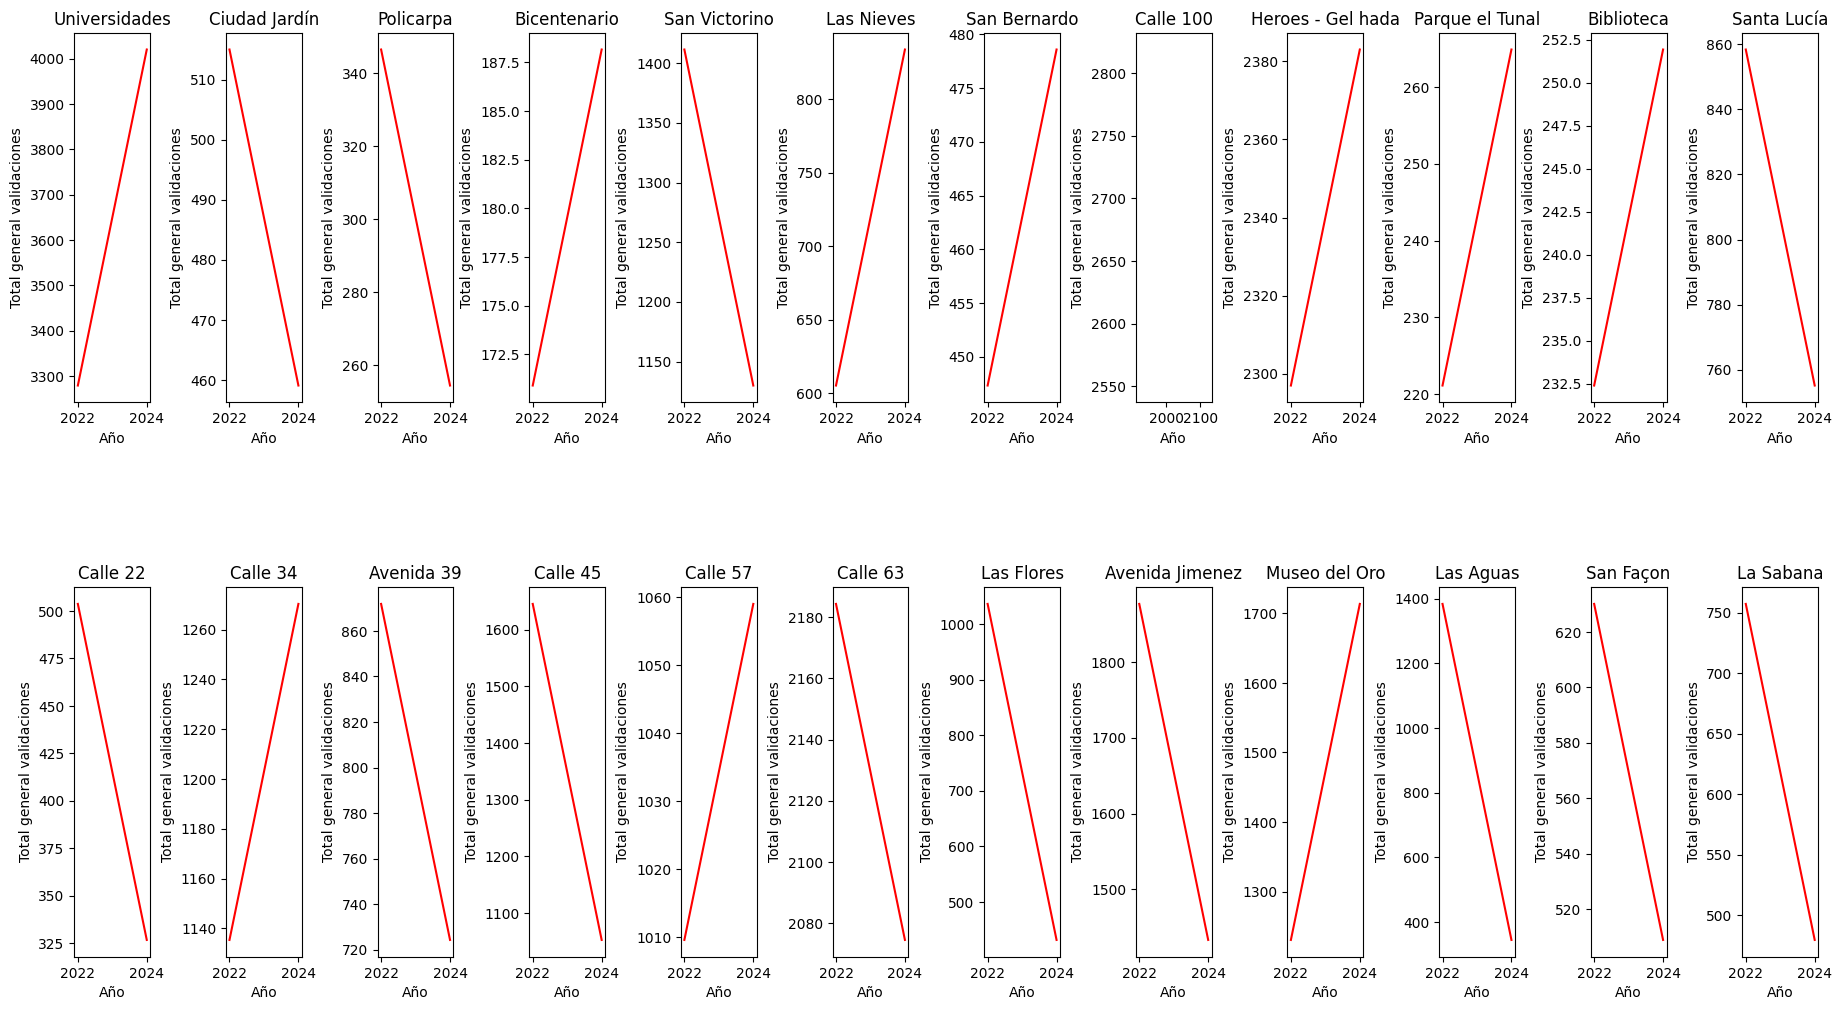

In [182]:
import matplotlib.pyplot as plt

# Obtener las estaciones únicas
estaciones = df_filtrado['Nombre Estación'].unique()

# Calcular el número de filas y columnas para los subplots
num_filas = 2
num_cols = (len(estaciones) + 1) // 2

# Crear la figura con múltiples subplots
fig, axes = plt.subplots(nrows=num_filas, ncols=num_cols, figsize=(22.5, 12))

# Iterar sobre las estaciones y graficar cada una en un subplot
for i, estacion in enumerate(estaciones):
    row = i // num_cols
    col = i % num_cols

    # Filtrar los datos para la estación actual
    datos_estacion = df_filtrado[df_filtrado['Nombre Estación'] == estacion]

    # Calcular la dirección de la tendencia
    tendencia = datos_estacion.groupby('Año')['Total general validaciones'].mean().diff().fillna(0)

    # Asignar colores a las tendencias ascendentes y descendentes
    color = []
    for valor in tendencia:
        if valor > 0:
            color.append('blue')
        else:
            color.append('red')

    # Graficar la línea para la estación actual con colores diferenciados
    datos_estacion.groupby('Año')['Total general validaciones'].mean().plot(kind='line', ax=axes[row, col], color=color)
    axes[row, col].set_title(f"{estacion}")
    axes[row, col].set_xlabel('Año')
    axes[row, col].set_ylabel('Total general validaciones')

# Ajustar el espaciado entre subplots
plt.subplots_adjust(wspace=1, hspace=0.5)

# Mostrar el gráfico
plt.show()

#### Conclusiones ####

1. Se evidencia una disminución en las medias de las validaciones en 13 de las 24 estaciones analizadas, las cuales son Ciudad Jardin, Policarpa, San victorino, Santa Lucia, Calle 22, Avenida 39, Calle 45, Calle 63, Las flores, Avenida Jimenez, Las Aguas, San Facon y de la Sabana.

2. Se evidencia una aumento en las medias de las validaciones en 10 de las 24 estaciones analizadas, las cuales son Universidades, Las Nieves, San Bernardo, Heroes Gel' Hada, parque el Tunal, Biblioteca, Calle 34, Calle 57 y Museo del Oro.

3. Para la estación Calle 100 no se tiene datos para el año 2024 por lo cual se excluira de los siguientes análisis.

## Grafica 2 ##

In [185]:
df_filtrado_2 = df_validaciones.loc[
(df_validaciones['Nombre Estación'] == 'Calle 63')
| (df_validaciones['Nombre Estación'] == 'Calle 45')
| (df_validaciones['Nombre Estación'] == 'Las Flores')
| (df_validaciones['Nombre Estación'] == 'Calle 57')
| (df_validaciones['Nombre Estación'] == 'Avenida 39')
| (df_validaciones['Nombre Estación'] == 'San Bernardo')
| (df_validaciones['Nombre Estación'] == 'Bicentenario')
| (df_validaciones['Nombre Estación'] == 'San Victorino')
| (df_validaciones['Nombre Estación'] == 'Las Nieves')
| (df_validaciones['Nombre Estación'] == 'Heroes - Gel hada')
| (df_validaciones['Nombre Estación'] == 'Avenida Jimenez')
| (df_validaciones['Nombre Estación'] == 'San Façon')
| (df_validaciones['Nombre Estación'] == 'Santa Lucía')
| (df_validaciones['Nombre Estación'] == 'Biblioteca')
| (df_validaciones['Nombre Estación'] == 'Parque el Tunal')
| (df_validaciones['Nombre Estación'] == 'Museo del Oro')
| (df_validaciones['Nombre Estación'] == 'Universidades')
| (df_validaciones['Nombre Estación'] == 'Calle 22')
| (df_validaciones['Nombre Estación'] == 'La Sabana')
| (df_validaciones['Nombre Estación'] == 'Calle 34')
| (df_validaciones['Nombre Estación'] == 'Policarpa')
| (df_validaciones['Nombre Estación'] == 'Ciudad Jardín')
| (df_validaciones['Nombre Estación'] == 'Las Aguas')
]

1. Revisando los datos se evidencia que no se encuentra datos de la estación calle 100 para el año 2024 por lo cual está estacion no se tendra en cuenta para el análisis de las validaciones al no poder realizarse comparaciones.

In [186]:
df_filtrado_2

,Año,Mes,Fase,Nombre Estación,Total general validaciones
1992,2022,Enero,Fase 3,Universidades,273
1993,2022,Enero,Fase 3,Universidades,439
1994,2022,Enero,Fase 3,Universidades,639
1995,2022,Enero,Fase 3,Universidades,1356
1996,2022,Enero,Fase 3,Universidades,1510
...,...,...,...,...,...
365214,2024,Abril,Fase 1,La Sabana,1
365215,2024,Abril,Fase 1,La Sabana,3
365216,2024,Abril,Fase 1,La Sabana,3
365217,2024,Abril,Fase 1,La Sabana,3


<Figure size 1400x950 with 0 Axes>

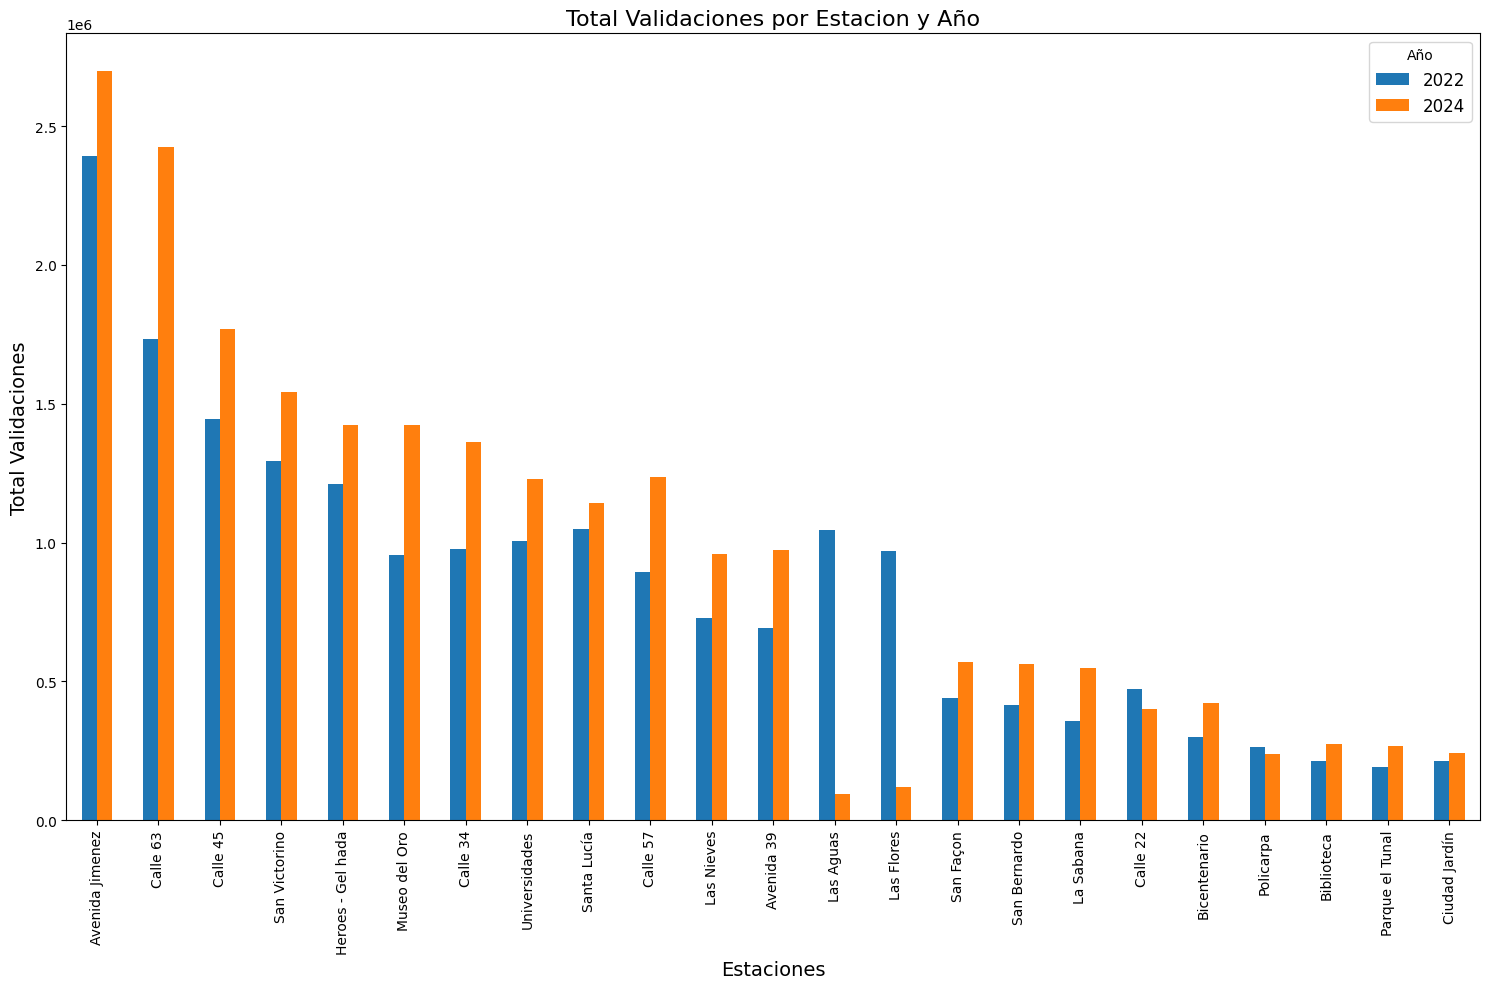

In [187]:
# Agrupar por 'Nombre Estación' y 'Año', sumar 'Total general validaciones'
df_agrupado = df_filtrado_2.groupby(['Nombre Estación', 'Año'])['Total general validaciones'].sum().unstack()

# Ordenar las filas por la suma de todas las columnas en orden descendente
df_agrupado = df_agrupado.loc[df_agrupado.sum(axis=1).sort_values(ascending=False).index]

# Ajustar el tamaño de la figura
plt.figure(figsize=(14, 9.5))

# Generar el gráfico de barras
df_agrupado.plot(kind='bar', figsize=(15, 10))

# Ajustar el título y etiquetas de los ejes
plt.title('Total Validaciones por Estacion y Año', fontsize=16)
plt.xlabel('Estaciones', fontsize=14)
plt.ylabel('Total Validaciones', fontsize=14)

# Ajustar la leyenda
plt.legend(title='Año', fontsize=12, bbox_to_anchor=(1, 1))

# Ajustar el espacio entre los elementos del gráfico
plt.tight_layout()

# Mostrar el gráfico
plt.show()

#### Conclusiones ####

1. Revisando los datos se evidencia que no se encuentra datos de la estación calle 100 para el año 2024 por lo cual está estacion no se tendra en cuenta para el análisis de las validaciones al no poder realizarse comparaciones.
2. En general se evidencia que hubo un aumento en (19) diecinueve de las 24 estaciones respecto a las validaciones del año 2022 al año 2024

## Grafica 3 ##

In [143]:
df_filtrado_3 = df_validaciones.loc[
  (df_validaciones['Nombre Estación'] == 'Las Flores')
| (df_validaciones['Nombre Estación'] == 'Las Aguas')
| (df_validaciones['Nombre Estación'] == 'Calle 22')
| (df_validaciones['Nombre Estación'] == 'Las Aguas')
| (df_validaciones['Nombre Estación'] == 'Policarpa')
]

In [144]:
df_filtrado_3

,Año,Mes,Fase,Nombre Estación,Total general validaciones
3362,2022,Enero,Fase 3,Policarpa,2
3363,2022,Enero,Fase 3,Policarpa,37
3364,2022,Enero,Fase 3,Policarpa,30
3365,2022,Enero,Fase 3,Policarpa,115
3366,2022,Enero,Fase 3,Policarpa,121
...,...,...,...,...,...
357333,2024,Abril,Fase 1,Calle 22,256
357334,2024,Abril,Fase 1,Calle 22,132
357335,2024,Abril,Fase 1,Calle 22,78
357336,2024,Abril,Fase 1,Calle 22,25


<Figure size 1200x800 with 0 Axes>

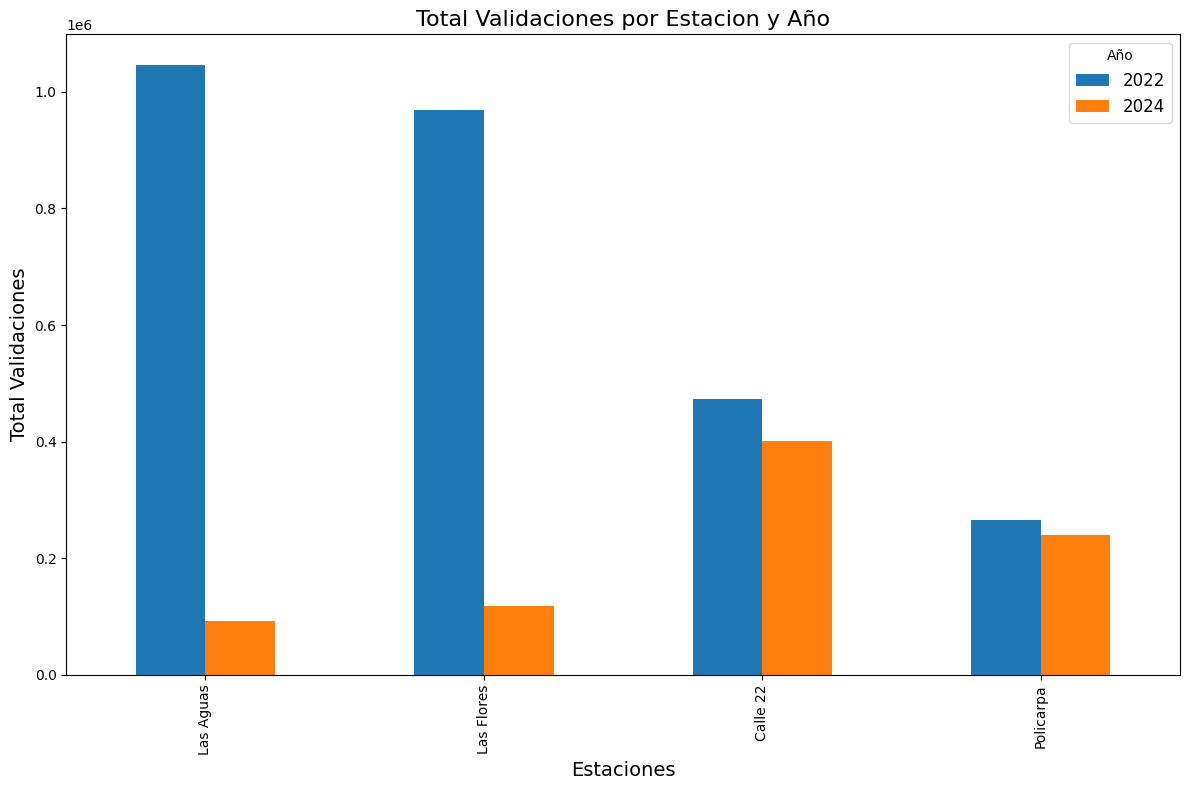

In [145]:
# Agrupar por 'Nombre Estación' y 'Año', sumar 'Total general validaciones'
df_agrupado_3 = df_filtrado_3.groupby(['Nombre Estación', 'Año'])['Total general validaciones'].sum().unstack()

# Ordenar las filas por la suma de todas las columnas en orden descendente
df_agrupado_3 = df_agrupado_3.loc[df_agrupado_3.sum(axis=1).sort_values(ascending=False).index]

# Ajustar el tamaño de la figura
plt.figure(figsize=(12, 8))

# Generar el gráfico de barras
df_agrupado_3.plot(kind='bar', figsize=(12, 8))

# Ajustar el título y etiquetas de los ejes
plt.title('Total Validaciones por Estacion y Año', fontsize=16)
plt.xlabel('Estaciones', fontsize=14)
plt.ylabel('Total Validaciones', fontsize=14)

# Ajustar la leyenda
plt.legend(title='Año', fontsize=12, bbox_to_anchor=(1, 1))

# Ajustar el espacio entre los elementos del gráfico
plt.tight_layout()

# Mostrar el gráfico
plt.show()

#### Conclusiones ####

1. Revisando los datos se evidencia una disminución drastica de las validaciones en las estaciones Las Aguas y las Flores que tienen instaladas nuevas puertas automaticas respecto a el año 2022 que no tenian puertas con respecto al año 2024 en el cual las estaciones tiene puertas instalas.

  Se debe revisar si la causa de este comportamiento se debe a la disminución de la demanda en el contexto operacion o un factor externo de la zona en particular para estas dos estaciones.

2. En general se para la estaciones policarpa y la calle 22 se evidencian resultados similares, en ese sentido se debe revisar si esto se debe al funcionamiento de las puertas o a la migración de estaciones cercanas que no cuenta con nuevas puertas automaticas.